In [ ]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
import numpy as np

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


In [ ]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [1]:
cables = [(None, 3, 206), (None, 5, 287), (None, 7, 406)]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
border = np.array( # vertices oriented counter-clockwise
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
# 'obstacles' is an optional location attribute
obstacles = [
    # - vertices oriented clockwise for each obstacle polygon
    # - obstacles must be strictly inside the extents polygon
    # - undefined behavior if obstacles and extents borders overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

NameError: name 'np' is not defined

In [ ]:
wfn = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables,)

router = Heuristic(wfn=wfn, solver='EW') # default is EW
router()
grad_wt, grad_ss = router.gradient()
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

[(11, 10, {'length': 474.6472374300729, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 97777.33091059502}), (-1, 4, {'length': 627.251943002172, 'load': 5, 'reverse': False, 'cable': 1, 'cost': 180021.30764162337}), (-1, 6, {'length': 616.1120028046848, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 250141.47313870204}), (-1, 5, {'length': 402.54813376787627, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 82924.91555618252}), (3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length': 445.05505277437305, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 91681.34087152085}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'length': 336.60956611

In [25]:
print('here is the:', wfn.L.name)

here is the: aaa


In [3]:
substations = np.array([[695, 1060],], dtype=float)
router(turbines=turbines, substations=substations)
print(wfn.cost())
#print(wfn.G.graph['VertexC'][-substations.shape[0]:, :])
grad_wt, grad_ss = router.gradient()
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())


1438566.1977794454
[(11, 10, {'length': 474.6472374300729, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 97777.33091059502}), (-1, 4, {'length': 628.0286617663241, 'load': 5, 'reverse': False, 'cable': 1, 'cost': 180244.22592693503}), (-1, 6, {'length': 626.4096103988188, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 254322.30182192044}), (-1, 5, {'length': 391.6758864163072, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 80685.23260175929}), (3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length': 445.05505277437305, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 91681.34087152085}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'le

In [4]:
substations = np.array([[700, 1050],], dtype=float)
grad_wt, grad_ss = router.gradient(turbines=turbines, substations=substations)

[(11, 10, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}), (-1, 4, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}), (-1, 6, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}), (-1, 5, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}), (3, 4, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}), (3, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}), (0, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}), (2, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False,

In [5]:

print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

gradients_wt
 [[   9.70618904 -205.77120764]
 [   0.            0.        ]
 [-205.97451805   -3.2400486 ]
 [ 255.86790133  180.36510604]
 [   0.            0.        ]
 [   0.            0.        ]
 [-127.67235372  161.66561198]
 [   0.            0.        ]
 [ -15.58364377 -340.42274323]
 [ -50.69989847 -199.66351769]
 [   0.            0.        ]
 [ -49.04273777  200.07700985]]
gradients_ss
 [[-156.3601524   134.58190589]]

cost:  1436402.1337653387


In [6]:
net = wfn.get_network()
print(net)
net2 = wfn.get_network_array()
net_list = list(net)
print(type(net_list[0][0]))

print(net2[:, 0].dtype)
print(net2)
#wfn.plot()

[(11, 10, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}), (-1, 4, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}), (-1, 6, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}), (-1, 5, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}), (3, 4, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}), (3, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}), (0, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}), (2, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False,

In [7]:
New_network = [(1, 1, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}),
               (1, 1, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}),
               (1, 1, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}),
               (1, 1, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}),
               (1, 1, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}),
               (1, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}),
               (1, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}),
               (1, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(91681.34087152085)}),
               (1, 1, {'length': np.float64(415.12046444375636), 'load': 3, 'reverse': False, 'cable': 0, 'cost': np.float64(85514.8156754138)}),
               (1, 1, {'length': np.float64(336.60956611480907), 'load': 4, 'reverse': False, 'cable': 1, 'cost': np.float64(96606.9454749502)}),
               (1, 1, {'length': np.float64(394.12307722334657), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(81189.35390800939)}),
               (1, 1, {'length': np.float64(521.1621628629615), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(107359.40554977008)})]
#wfn.G.edges()
#wfn.set_network(network_tree=New_network)
#wfn.plot()
grad_wt, grad_ss = router.gradient(network_tree=New_network)



[(1, 1, {'length': np.float64(0.0), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(0.0)})]


In [8]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())


gradients_wt
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
gradients_ss
 [[0. 0.]]

cost:  0.0


In [9]:
#wfn.set_network(network_tree=New_network)
print(net2)
net3 = net2
net3[0][1] = 5
wfn.set_network_array(network_array=net3)
wfn.get_network()


[[ 1.10000000e+01  1.00000000e+01  4.74647237e+02  1.00000000e+00
   0.00000000e+00  0.00000000e+00  9.77773309e+04]
 [-1.00000000e+00  4.00000000e+00  6.27251943e+02  5.00000000e+00
   0.00000000e+00  1.00000000e+00  1.80021308e+05]
 [-1.00000000e+00  6.00000000e+00  6.16112003e+02  6.00000000e+00
   0.00000000e+00  2.00000000e+00  2.50141473e+05]
 [-1.00000000e+00  5.00000000e+00  4.02548134e+02  1.00000000e+00
   0.00000000e+00  0.00000000e+00  8.29249156e+04]
 [ 3.00000000e+00  4.00000000e+00  5.63879420e+02  4.00000000e+00
   1.00000000e+00  1.00000000e+00  1.61833393e+05]
 [ 3.00000000e+00  1.00000000e+00  5.52964737e+02  3.00000000e+00
   1.00000000e+00  0.00000000e+00  1.13910736e+05]
 [ 0.00000000e+00  1.00000000e+00  4.24471436e+02  1.00000000e+00
   1.00000000e+00  0.00000000e+00  8.74411158e+04]
 [ 2.00000000e+00  1.00000000e+00  4.45055053e+02  1.00000000e+00
   0.00000000e+00  0.00000000e+00  9.16813409e+04]
 [ 8.00000000e+00  1.00000000e+01  4.15120464e+02  3.00000000e+0

EdgeDataView([(11, 5, {'length': np.float64(607.4553481532614), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(125135.80171957186)}), (-1, 4, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}), (-1, 6, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}), (-1, 5, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}), (3, 4, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}), (3, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}), (0, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}), (2, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'rev

In [10]:
grad_wt, grad_ss = router.gradient()
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

[(11, 5, {'length': np.float64(607.4553481532614), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(125135.80171957186)}), (-1, 4, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}), (-1, 6, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}), (-1, 5, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}), (3, 4, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}), (3, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}), (0, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}), (2, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False,

<Axes: >

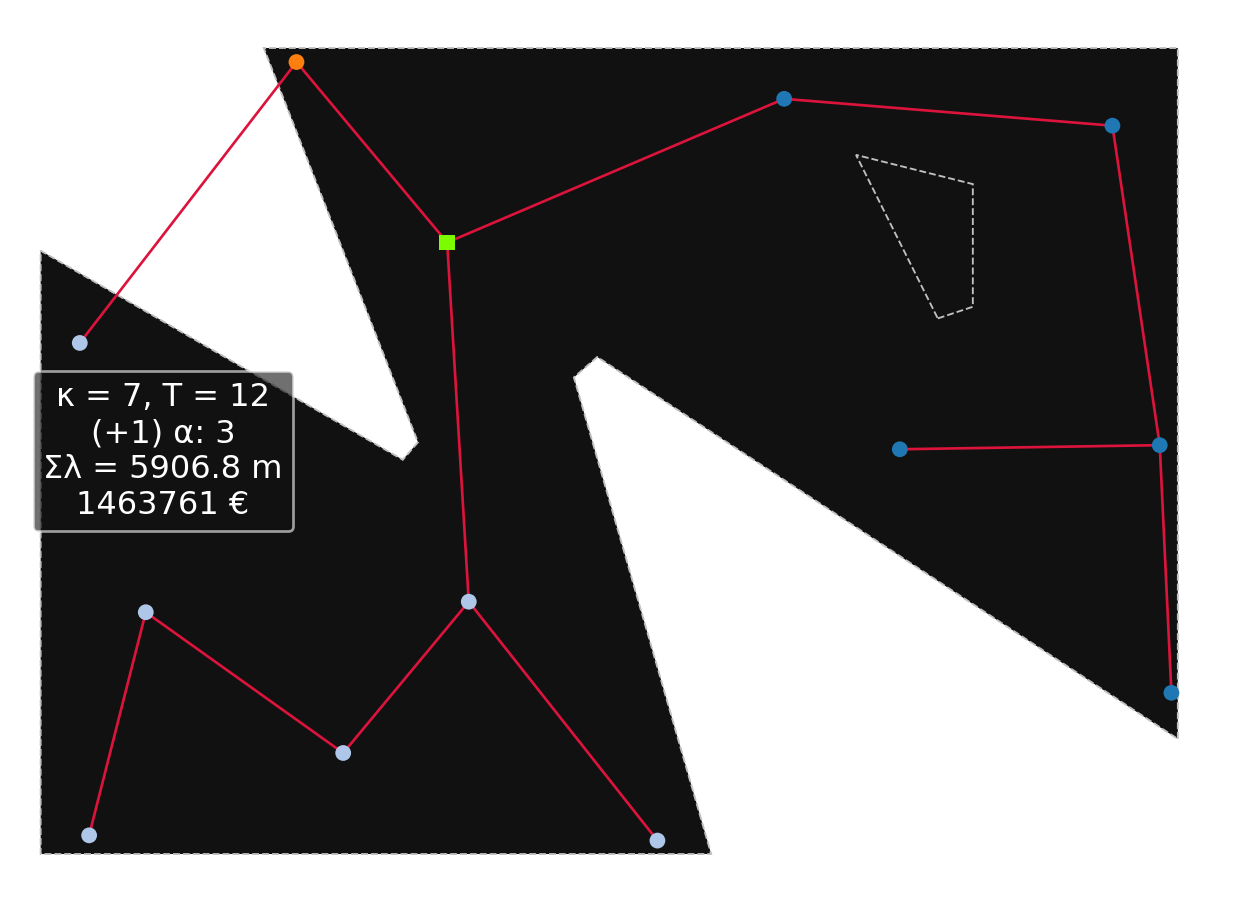

In [11]:
wfn.plot()

In [12]:
# MILP
wfn2 = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables)
router2 = MILP(wfn=wfn2) # default is EW
router2()
grad_wt, grad_ss = router2.gradient()


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model '': (model_fingerprint: 0xe00b0b13f9f4eb8)
#Variables: 156 (#bools: 45 in floating point objective)
  - 111 Booleans in [0,1]
  - 33 in [-6,6]
  - 12 in [0,7]
#kAtMostOne: 25 (#literals: 104)
#kLinear1: 222 (#enforced: 222)
#kLinearN: 15 (#terms: 147)

Starting presolve at 0.00s
[Scaling] Floating point objective has 45 terms with magnitude in [336.61, 1997.76] average = 885.508
[Scaling] Objective coefficient relative error: 2.15367e-08
[Scaling] Objective worst-case absolute error: 8.53302e-05
[Scaling] Objective scaling factor: 65536
  1.11e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.89e-03s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  2.79e-05s  0.00e+00d  [operations_research::sat::CpModelPresolver::ExtractEncodingFromLinear] #potential_sup

In [13]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

gradients_wt
 [[   0.            0.        ]
 [ 196.26832901  209.01125624]
 [   0.            0.        ]
 [ -30.17552277  203.777913  ]
 [-286.0434241    23.41280695]
 [   0.            0.        ]
 [  55.64091546  382.49415485]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [ -67.98698916  119.1807082 ]
 [   0.            0.        ]]
gradients_ss
 [[-156.3601524   134.58190589]]

cost:  1463760.6045743155


<Axes: >

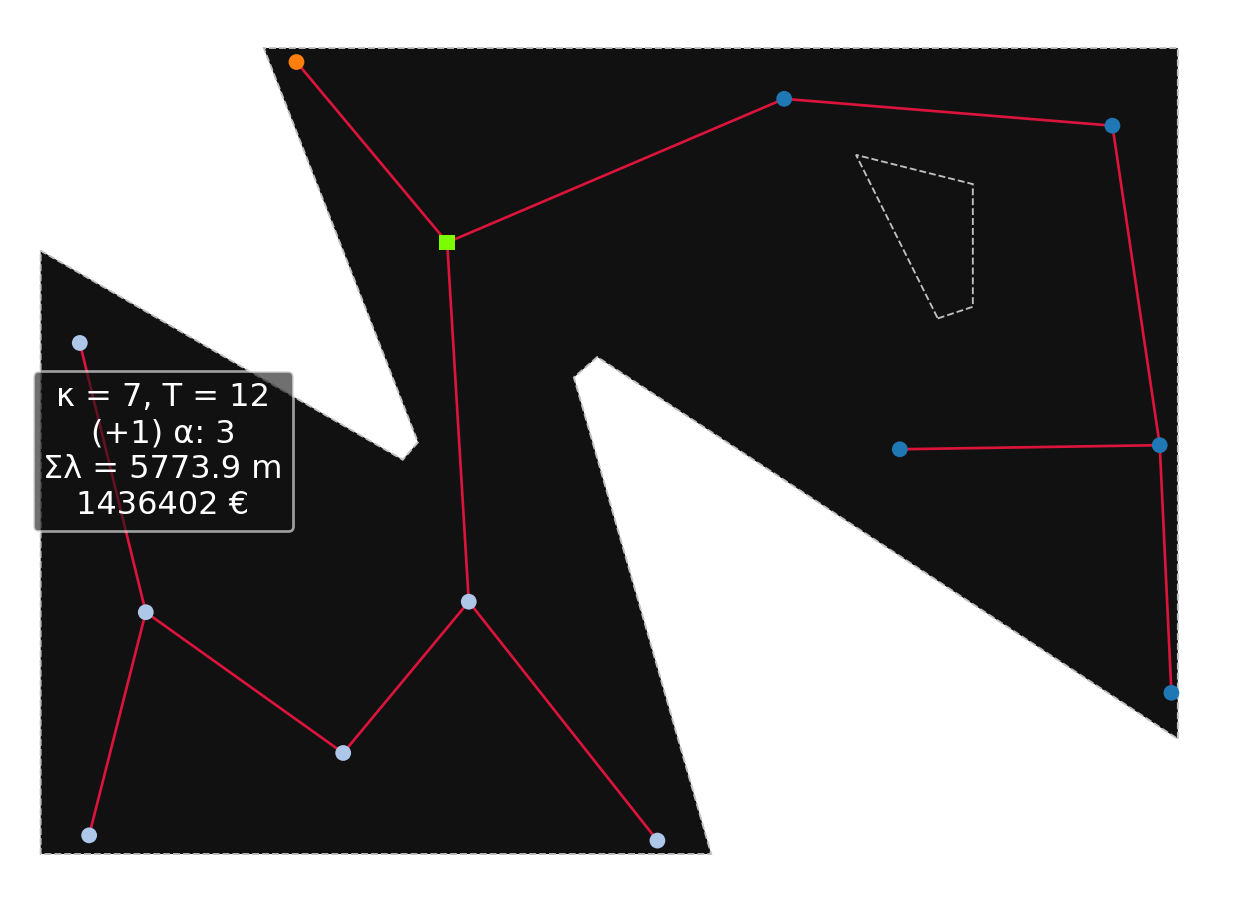

In [14]:
wfn2.plot()

In [15]:
wfn3 = WindFarmNetwork.from_yaml(filepath="C:/code/OptiWindNet/docs/notebooks/data/example_location.yaml")

In [16]:
from pathlib import Path

filepath = Path("C:/code/OptiWindNet/docs/notebooks/data/IEA37_Borssele_Regular_System.yaml")

if filepath.exists():
    print("File found!")
else:
    print("File not found!")

File found!


In [17]:
wfn4 = WindFarmNetwork.from_windIO(filepath="C:/code/OptiWindNet/docs/notebooks/data/IEA37_Borssele_Regular_System.yaml")

In [18]:
print(wfn.L.graph['VertexC'])

[[1940.  279.]
 [1920.  703.]
 [1475.  696.]
 [1839. 1250.]
 [1277. 1296.]
 [ 442. 1359.]
 [ 737.  435.]
 [1060.   26.]
 [ 522.  176.]
 [  87.   35.]
 [ 184.  417.]
 [  71.  878.]
 [1951.  200.]
 [1951. 1383.]
 [ 386. 1383.]
 [ 650.  708.]
 [ 624.  678.]
 [   4. 1036.]
 [   4.    3.]
 [1152.    3.]
 [ 917.  819.]
 [ 957.  854.]
 [1540.  920.]
 [1600.  940.]
 [1600. 1150.]
 [1400. 1200.]
 [ 700. 1050.]]


In [19]:
print(dir(wfn.L))
print(wfn4.L.graph['VertexC'])


['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__networkx_backend__', '__networkx_cache__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_node', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'number_of_edges', 'number_of_nodes', 'order', 'remove_edge'